In [1]:
from PageSpider.PageSpider import spideRegisterPage
from ContestData.Submission import getSubmission
from ConfigRead.ConfigRead import raedConfig
from Analysis.Analysis import ProblemAnalysis
import matplotlib.pyplot as plt
%matplotlib inline

## 定义如何更新每个Team的提交,保证Modify操作是按照时间顺序进行的

In [2]:
def Modify( SolveStatus , problem , status , time ):
    if problem not in SolveStatus:
        SolveStatus[problem] = ['Not Correct' , 0 , 0]
    if SolveStatus[problem][0] == 'correct':
        return
    SolveStatus[problem][1] = SolveStatus[problem][1] + 1
    if status == 'correct':
        SolveStatus[problem][0] = 'correct'
        SolveStatus[problem][2] = time

## 读取配置文件Config.conf，获取相关参数

In [3]:
hostUrl, contestId, maxRegisterPageNumber, xmlPath = raedConfig( 'config.conf' )

## 抓取Register页面,并初始化Team的相关参数.

+ TeamSet是一个List,里面的每一项都是一个Dict,初始时每个Dict只有一个Key值,为name,标明这个Team的名字。
+ TeamDict提供了名字到TeamSet下标的映射,是一个Dict,Key值为这个Team的队员的`NickName` + ' ' + `Name`,Value则为在TeamSet中所对应的Index下标。

In [4]:
TeamSet, TeamDict = spideRegisterPage(
    registerurl='http://' + hostUrl + '/contest/registryStatusList' ,
    contestid = int(contestId),
    maxpageindex = int(maxRegisterPageNumber)
)

2018-03-27 21:35:34,470 - PageSpider.PageSpider - INFO - Spide RegisterPage Status: 1/25
2018-03-27 21:35:34,674 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTP connection (1): qscoj.cn
2018-03-27 21:35:35,036 - PageSpider.PageSpider - INFO - Spide RegisterPage Status: 2/25
2018-03-27 21:35:35,039 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTP connection (1): qscoj.cn
2018-03-27 21:35:35,391 - PageSpider.PageSpider - INFO - Spide RegisterPage Status: 3/25
2018-03-27 21:35:35,391 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTP connection (1): qscoj.cn
2018-03-27 21:35:35,707 - PageSpider.PageSpider - INFO - Spide RegisterPage Status: 4/25
2018-03-27 21:35:35,707 - requests.packages.urllib3.connectionpool - INFO - Starting new HTTP connection (1): qscoj.cn
2018-03-27 21:35:36,019 - PageSpider.PageSpider - INFO - Spide RegisterPage Status: 5/25
2018-03-27 21:35:36,019 - requests.packages.urllib3.connectionpool - INFO - Sta

## 将Contest导出的XML文件进行解析,获取比赛提交数据.

In [5]:
SubmissionSet = getSubmission( xmlPath )

## 按照比赛的时间戳更新每个队伍的状态.

In [6]:
for _ in SubmissionSet:
    setIndex = TeamDict[_.name]
    Modify( SolveStatus = TeamSet[setIndex],
    problem = _.problem,
    status = _.judgeResult,
    time = _.time)

## 计算比赛提交的条形图

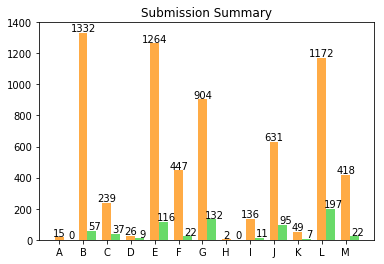

In [7]:
ListSummary = ProblemAnalysis( TeamSet )
plt.bar(range( 0 , 8 * len( ListSummary ) , 8 ), 
        list(map( lambda x : x[1] , ListSummary )) , 
        align = 'center',color='darkorange', 
        width = 3,
        alpha = 0.73)
plt.bar(range( 3 , 8 * len( ListSummary ) + 3 , 8 ), 
        list(map( lambda x : x[2] , ListSummary )) , 
        align = 'center',color='limegreen', 
        width = 3,
        alpha = 0.73)
plt.title('Submission Summary')
plt.xticks(range(0 , len( ListSummary ) * 8 , 8 ) , map( lambda x : x[0] , ListSummary ) )
for x , y in enumerate( ListSummary ):
    plt.text( 8 * x , int(y[1]) + 10 , '%d' % ( int(y[1]) ) , ha = 'center' )
for x , y in enumerate( ListSummary ):
    plt.text( 3 + 8 * x + 1 , int(y[2]) + 10 , '%d' % ( int(y[2]) ) , ha = 'center' )
plt.show()

## 计算题目饼状图

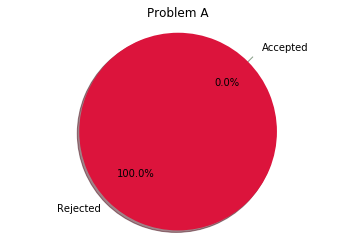

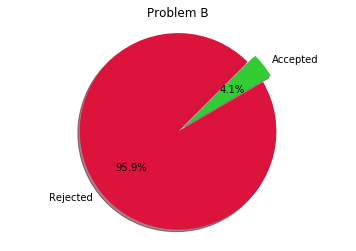

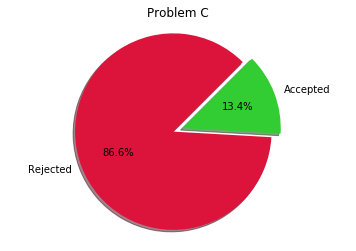

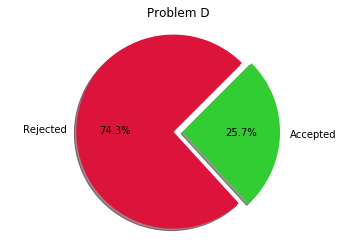

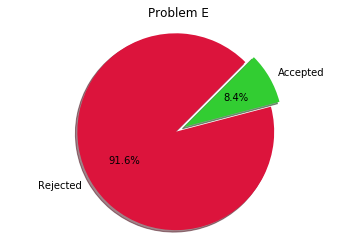

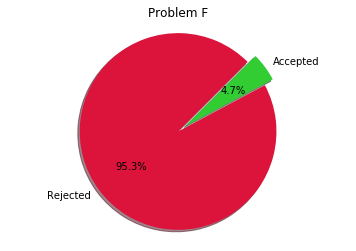

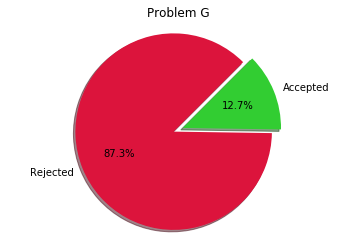

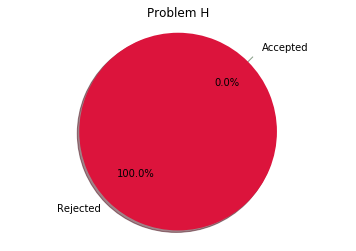

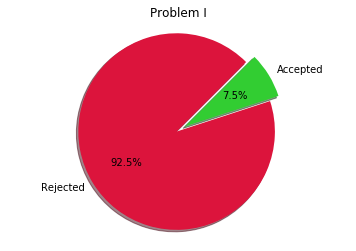

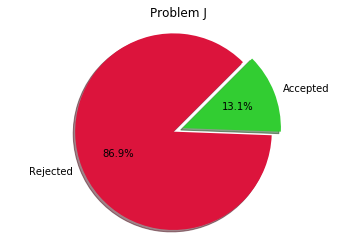

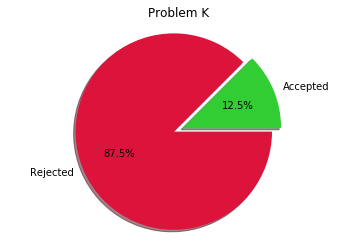

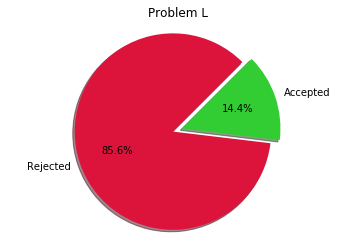

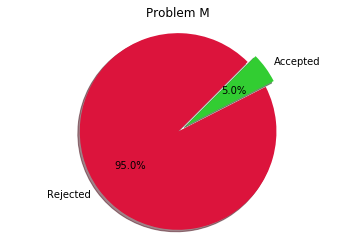

In [28]:
ListSummary = ProblemAnalysis( TeamSet )
for _ in ListSummary:
    fig1, ax1 = plt.subplots()
    ax1.pie([_[1] , _[2]], [0 , 0.1], labels= ['Rejected' , 'Accepted'], colors = ['crimson' , 'limegreen'] , autopct='%1.1f%%',
        shadow=True, startangle= 45  )
    ax1.axis('equal')
    ax1.set_title( 'Problem ' + _[0] )
    plt.show()